In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df= pd.read_csv('/content/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
df['Category'].nunique()

25

In [ ]:
categories = df['Category'].value_counts().reset_index()
categories

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


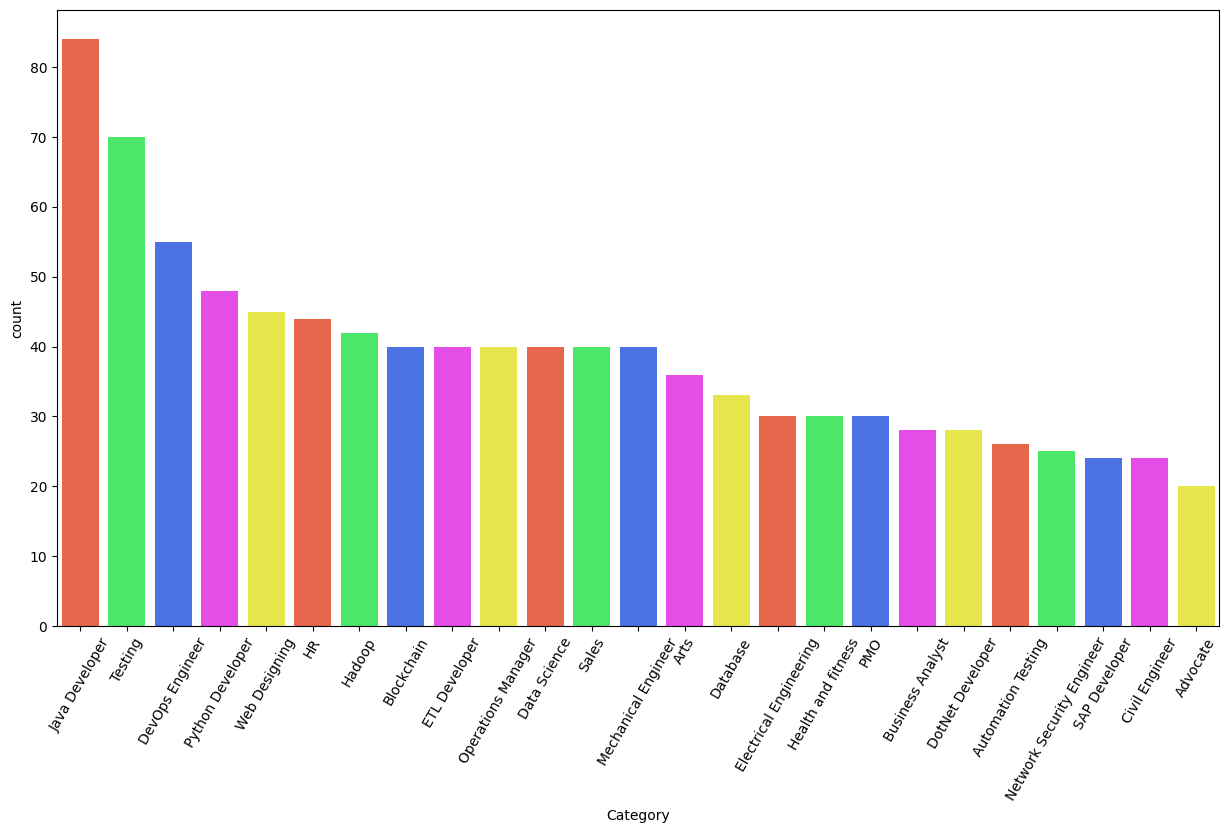

In [ ]:
# Define a custom color palette with  colors
custom_colors = ["#FF5733", "#33FF57", "#3366FF", "#FF33FF", "#FFFF33"]

# Assuming 'Category' is the column name you want to count
plt.figure(figsize=(15, 8))
plt.xticks(rotation=60)

# Specify the custom colors and order
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index, palette=custom_colors)

# Show the plot
plt.show()







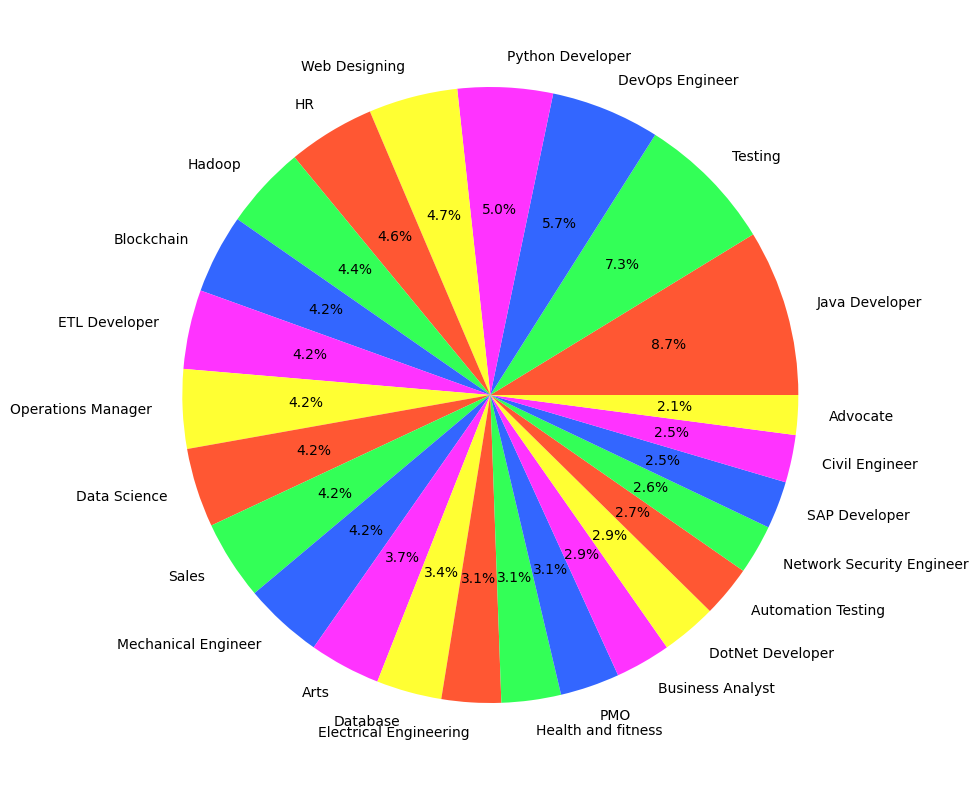

In [ ]:
# Define a custom color palette with colors
custom_colors = ["#FF5733", "#33FF57", "#3366FF", "#FF33FF", "#FFFF33"]

# Assuming you have a DataFrame named 'categories' with 'index' and 'Category' columns
plt.figure(figsize=(10, 10))

# Use the custom colors in the pie chart
plt.pie(categories['Category'], labels=categories['index'], colors=custom_colors, autopct='%.1f%%')

plt.show()

Preprocessing

In [ ]:
df1= df.copy()
df1['cleaned_resume']= ""
df1

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [ ]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

apply to columns

In [ ]:
df1['cleaned_resume'] = df1['Resume'].apply(lambda x: clean_function(x))
df1.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


encode the Category column

In [ ]:
from sklearn.preprocessing import LabelEncoder
df2= df1.copy()
df2['Category']= LabelEncoder().fit_transform(df2['Category'])
df2.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [ ]:
#Stop words are generally the most common words in a language.
#English stop words from nltk:
SetOfStopWords= set(stopwords.words('english')+['``',"''"])

In [ ]:
Sentences= df2['Resume'].values

In [ ]:
cleanedSentences= ""

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
totalWords= []

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


for records in Sentences:
    cleanedText = clean_function(records)
    cleanedSentences += cleanedText
    requiredWords = word_tokenize(cleanedText)  # Use word_tokenize from nltk
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)



In [ ]:
Sentences= df2['Resume'].values

In [ ]:
wordfreqdist = nltk.FreqDist(totalWords)

In [ ]:
wordfreqdist

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

In [ ]:
mostcommon = wordfreqdist.most_common(30)

In [ ]:
mostcommon

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746)]

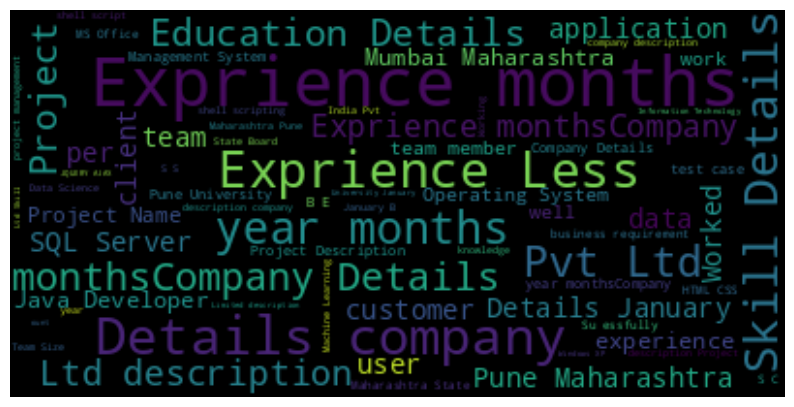

In [ ]:
from wordcloud import WordCloud
WordCloud= WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [ ]:
Text= df2['cleaned_resume'].values
Target= df2['Category'].values

In [ ]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(Text)
WordFeatures= word_vectorizer.transform(Text)

In [ ]:
WordFeatures.shape

(962, 7351)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(721, 7351)
(241, 7351)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),
    'Random Forest' : RandomForestClassifier()
}

In [ ]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC()),
 OneVsRestClassifier(estimator=RandomForestClassifier())]

In [ ]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
************************************************************
all models trained


In [48]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9805825242718447
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.966804979253112
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.991701244813278
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.991701244813278
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=RandomForestClassifier()) on t

In [50]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9
           6       0.88      0.78      0.82         9
           7       1.00      0.89      0.94         9
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00         6
          14       1.00      0.7

In [51]:
from sklearn.model_selection import cross_val_score, KFold

In [52]:
results = {}

kf = KFold(n_splits= 10)

for count, value in enumerate(model_list):
    result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = result

In [53]:
print("r2 scores")
print("*********************************")
for name, result in results.items():

    print(f'{name} : {round(np.mean(result),3)}')
    print("----------------")

r2 scores
*********************************
OneVsRestClassifier(estimator=KNeighborsClassifier()) : 0.958
----------------
OneVsRestClassifier(estimator=LogisticRegression()) : 0.99
----------------
OneVsRestClassifier(estimator=SVC()) : 0.997
----------------
OneVsRestClassifier(estimator=RandomForestClassifier()) : 0.994
----------------


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [56]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df2['cleaned_resume'].values)
X_lstm = tokenizer.texts_to_sequences(df2['cleaned_resume'].values)
X_lstm = pad_sequences(X_lstm)

y_lstm = pd.get_dummies(df2['Category']).values

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, random_state=42)

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=X_lstm.shape[1]))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(len(df['Category'].unique()), activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.fit(X_train_lstm, y_train_lstm, epochs=25, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

lstm_scores = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"LSTM Model Accuracy: {lstm_scores[1]*100:.2f}%")

Epoch 1/25
23/23 [==============================] - 79s 3s/step - loss: 3.1636 - accuracy: 0.2816 - val_loss: 2.9969 - val_accuracy: 0.2407
Epoch 2/25
23/23 [==============================] - 76s 3s/step - loss: 2.8057 - accuracy: 0.2926 - val_loss: 2.5264 - val_accuracy: 0.3402
Epoch 3/25
23/23 [==============================] - 82s 4s/step - loss: 2.1881 - accuracy: 0.4716 - val_loss: 1.9379 - val_accuracy: 0.4730
Epoch 4/25
23/23 [==============================] - 74s 3s/step - loss: 1.5030 - accuracy: 0.6366 - val_loss: 1.3328 - val_accuracy: 0.6763
Epoch 5/25
23/23 [==============================] - 75s 3s/step - loss: 0.9276 - accuracy: 0.8183 - val_loss: 0.8758 - val_accuracy: 0.8091
Epoch 6/25
23/23 [==============================] - 74s 3s/step - loss: 0.5573 - accuracy: 0.9057 - val_loss: 0.5822 - val_accuracy: 0.8714
Epoch 7/25
23/23 [==============================] - 68s 3s/step - loss: 0.3672 - accuracy: 0.9362 - val_loss: 0.4195 - val_accuracy: 0.9170
Epoch 8/25
23/23 [==